# Clase #3

In [121]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [122]:
def imshow(src, cmap = 'gray', vmin=0, vmax=255):
    plt.axis('off')
    plt.imshow(src, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.show()

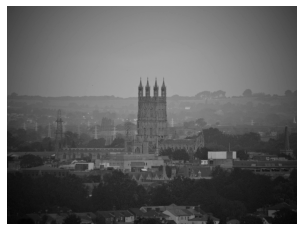

In [123]:
# cargar imágenes
image = cv.imread('./images/im8.jpg', cv.IMREAD_GRAYSCALE)
imshow(image)

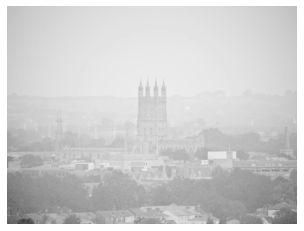

In [124]:
log_t = lambda x, c: c * np.log(1 + image)
imshow(log_t(image.astype('float'), 255 / np.log(256)).astype(np.uint8))

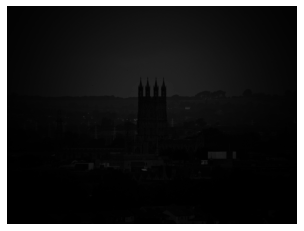

In [125]:
exp_t = lambda x, c: np.exp(x / c) - 1
imshow(exp_t(image.astype('float'), 255 / np.log(256)).astype(np.uint8))

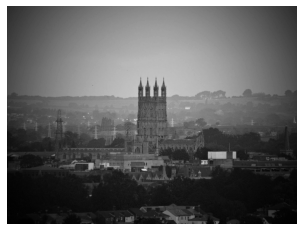

In [126]:
gamma = lambda x, g: (x ** g) * (255 / np.max(x ** g))
imshow(gamma(image.astype('float'), 1.5).astype(np.uint8))

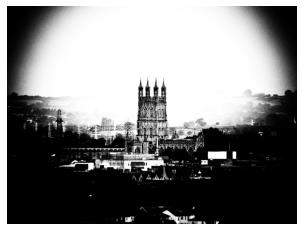

In [127]:
s = lambda x, m, e: 255 / (1 + (m / (x + 1)) ** e)
image_modified = s(image.astype('float'), 100, 20)
imshow(image_modified)

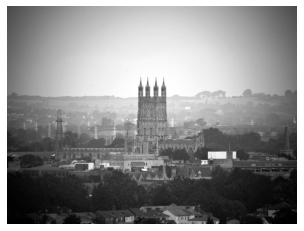

In [128]:
imshow(cv.equalizeHist(image))

In [129]:
def pad_image(image: np.ndarray, size = 1) -> np.ndarray:
    img_height, img_width = image.shape
    img_expanded = np.zeros((size * 2 +img_height, size * 2 + img_width), np.float32)
    img_expanded[size:size + img_height, size:size + img_width] = image
    return img_expanded

def create_kernel(size: int, value: int = 1) -> np.ndarray:
    if size % 2 == 0:
        raise ValueError('Kernel size must be odd')
    return np.ones((size, size), np.float32) * value

def transform(image: np.ndarray, kernel_size: int = 3) -> np.ndarray:    
    extra_col_rows = kernel_size // 2
    img_height, img_width = image.shape
    kernel = create_kernel(kernel_size)
    img_expanded = pad_image(image, extra_col_rows)
    img_modified = image.copy()

    for i in range(img_height):
        for j in range(img_width):
            part = img_expanded[i:i + kernel_size, j:j + kernel_size]
            img_modified[i, j] = (np.sum(part * kernel)) // (kernel_size ** 2)

    return img_modified